In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
df = pd.read_csv('Tomato.csv')

In [3]:
df

,image_id,Mean_R,Mean_G,Mean_B,Std_R,Std_G,Std_B,Skew_R,Skew_G,Skew_B,...,Homogeneity_45,Contrast_90,Correlation_90,Energy_90,Homogeneity_90,Contrast_135,Correlation_135,Energy_135,Homogeneity_135,Grade
0,frame110.jpg,76.718346,27.990320,17.086820,106.667204,51.014825,42.349059,0.782999,2.192736,3.338703,...,0.575056,548.281912,0.894712,0.514432,0.586606,700.066841,0.865858,0.508822,0.573172,1
1,frame240.jpg,113.034349,35.532920,21.010144,84.893457,48.958522,45.818761,-0.280012,2.067089,2.994477,...,0.285918,517.658656,0.888940,0.155666,0.304593,608.939337,0.869540,0.152218,0.284119,1
2,frame250.jpg,113.675066,36.256742,21.727671,85.073852,49.927705,46.959050,-0.287860,2.033024,2.924368,...,0.289214,518.915166,0.892924,0.158095,0.306950,610.949998,0.874106,0.154410,0.287049,1
3,frame260.jpg,114.171972,37.246604,22.722233,85.157021,51.456534,48.680782,-0.296853,2.000309,2.833765,...,0.291988,536.628384,0.895440,0.161716,0.308869,614.350513,0.880460,0.157598,0.289676,1
4,frame270.jpg,114.251510,38.055804,23.651326,85.102833,52.943685,50.252845,-0.295871,1.973671,2.749690,...,0.291449,546.893655,0.898911,0.162191,0.307668,628.548930,0.883980,0.158199,0.288832,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,rotten (95).jpg,57.154683,44.075770,40.624102,66.608523,54.257840,52.086966,0.906762,1.114390,1.275525,...,0.387032,974.044165,0.832085,0.294045,0.420737,1333.848155,0.770263,0.281587,0.383221,2
265,rotten (96).jpg,43.692381,40.855193,48.390881,58.545949,55.491366,62.886003,1.341146,1.358163,1.187897,...,0.398960,941.528198,0.856032,0.298614,0.432035,1301.040961,0.801301,0.287295,0.398924,2
266,rotten (97).jpg,61.445004,51.428911,48.240715,75.639094,69.162184,67.200263,0.777180,1.000821,1.108749,...,0.399185,1785.991467,0.810749,0.314487,0.433509,2285.663441,0.758081,0.302088,0.395916,2
267,rotten (98).jpg,51.568321,45.710164,46.907582,62.844159,57.412480,58.454855,1.114923,1.168714,1.124631,...,0.363068,873.240460,0.867424,0.261283,0.395752,1208.687744,0.816675,0.249425,0.365883,2


### Clustering 

In [4]:
X = df.drop(['image_id','Grade'],axis=1)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_scaled

array([[-0.37770733, -1.54559538, -2.41416431, ...,  1.10939815,
         0.75839704,  0.76830089],
       [ 0.64172533, -0.98873865, -1.95761923, ...,  1.18709919,
        -1.05125404, -1.03491634],
       [ 0.65971101, -0.93530019, -1.87412281, ...,  1.28343803,
        -1.04012953, -1.01664226],
       ...,
       [-0.80644786,  0.18483402,  1.21111819, ..., -1.16487726,
        -0.29071007, -0.33748938],
       [-1.0836979 , -0.23737086,  1.05598567, ...,  0.07155836,
        -0.5579621 , -0.52484536],
       [-0.95261312, -0.46317995,  0.13545496, ..., -0.04740501,
        -0.4748365 , -0.42955819]])

In [7]:
km_clust = KMeans(n_clusters=3)
assigned_clusters = km_clust.fit_predict(X_scaled)

C:\Users\JAINAM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JAINAM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [8]:
df['assigned_clusters'] = assigned_clusters

In [9]:
df

,image_id,Mean_R,Mean_G,Mean_B,Std_R,Std_G,Std_B,Skew_R,Skew_G,Skew_B,...,Contrast_90,Correlation_90,Energy_90,Homogeneity_90,Contrast_135,Correlation_135,Energy_135,Homogeneity_135,Grade,assigned_clusters
0,frame110.jpg,76.718346,27.990320,17.086820,106.667204,51.014825,42.349059,0.782999,2.192736,3.338703,...,548.281912,0.894712,0.514432,0.586606,700.066841,0.865858,0.508822,0.573172,1,2
1,frame240.jpg,113.034349,35.532920,21.010144,84.893457,48.958522,45.818761,-0.280012,2.067089,2.994477,...,517.658656,0.888940,0.155666,0.304593,608.939337,0.869540,0.152218,0.284119,1,1
2,frame250.jpg,113.675066,36.256742,21.727671,85.073852,49.927705,46.959050,-0.287860,2.033024,2.924368,...,518.915166,0.892924,0.158095,0.306950,610.949998,0.874106,0.154410,0.287049,1,1
3,frame260.jpg,114.171972,37.246604,22.722233,85.157021,51.456534,48.680782,-0.296853,2.000309,2.833765,...,536.628384,0.895440,0.161716,0.308869,614.350513,0.880460,0.157598,0.289676,1,1
4,frame270.jpg,114.251510,38.055804,23.651326,85.102833,52.943685,50.252845,-0.295871,1.973671,2.749690,...,546.893655,0.898911,0.162191,0.307668,628.548930,0.883980,0.158199,0.288832,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,rotten (95).jpg,57.154683,44.075770,40.624102,66.608523,54.257840,52.086966,0.906762,1.114390,1.275525,...,974.044165,0.832085,0.294045,0.420737,1333.848155,0.770263,0.281587,0.383221,2,2
265,rotten (96).jpg,43.692381,40.855193,48.390881,58.545949,55.491366,62.886003,1.341146,1.358163,1.187897,...,941.528198,0.856032,0.298614,0.432035,1301.040961,0.801301,0.287295,0.398924,2,2
266,rotten (97).jpg,61.445004,51.428911,48.240715,75.639094,69.162184,67.200263,0.777180,1.000821,1.108749,...,1785.991467,0.810749,0.314487,0.433509,2285.663441,0.758081,0.302088,0.395916,2,2
267,rotten (98).jpg,51.568321,45.710164,46.907582,62.844159,57.412480,58.454855,1.114923,1.168714,1.124631,...,873.240460,0.867424,0.261283,0.395752,1208.687744,0.816675,0.249425,0.365883,2,2


In [10]:
df['Grade'].value_counts()

2    110
0     88
1     71
Name: Grade, dtype: int64

In [11]:
df['assigned_clusters'].value_counts()

0    102
2     94
1     73
Name: assigned_clusters, dtype: int64

In [12]:
metrics.adjusted_rand_score(df['assigned_clusters'],df['Grade'])

0.0286313119271239

### Supervised Learning 

In [13]:
X = df.drop(['image_id','Grade','assigned_clusters'],axis=1)
y = df['Grade']

In [14]:
sc1 = StandardScaler()
X_scaled = sc1.fit_transform(X)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=1121218)

In [16]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.57it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.82               0.77    None      0.82   
RandomForestClassifier             0.82               0.77    None      0.83   
LinearDiscriminantAnalysis         0.75               0.77    None      0.75   
XGBClassifier                      0.81               0.76    None      0.81   
ExtraTreesClassifier               0.81               0.76    None      0.81   
QuadraticDiscriminantAnalysis      0.79               0.73    None      0.79   
BaggingClassifier                  0.78               0.72    None      0.78   
NuSVC                              0.74               0.72    None      0.74   
AdaBoostClassifier                 0.75               0.71    None      0.75   
ExtraTreeClassifier                0.74               0.69    None      0.74   
LabelPropagation                   0.75 

In [17]:
num_feat = [feature for feature in df.columns if df[feature].dtype!='object']

In [18]:
print(num_feat)

['Mean_R', 'Mean_G', 'Mean_B', 'Std_R', 'Std_G', 'Std_B', 'Skew_R', 'Skew_G', 'Skew_B', 'Contrast_0', 'Correlation_0', 'Energy_0', 'Homogeneity_0', 'Contrast_45', 'Correlation_45', 'Energy_45', 'Homogeneity_45', 'Contrast_90', 'Correlation_90', 'Energy_90', 'Homogeneity_90', 'Contrast_135', 'Correlation_135', 'Energy_135', 'Homogeneity_135', 'Grade', 'assigned_clusters']


In [19]:
df['Grade'].value_counts()

2    110
0     88
1     71
Name: Grade, dtype: int64

In [20]:
X = df.drop(['image_id','Grade','assigned_clusters'],axis=1)
y = df['Grade'].values.flatten()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1121218, test_size=0.20)

In [22]:
num_feat.remove('Grade')

In [23]:
num_feat.remove('assigned_clusters')

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder, PowerTransformer, StandardScaler
  )

# Build numeric processor
to_scale = num_feat
numeric_pipe = make_pipeline(StandardScaler())

# Full processor
full = ColumnTransformer(
    transformers=[
        ("standardization", numeric_pipe, to_scale),
    ]
)

# Final pipeline combined with RandomForest
pipeline = Pipeline(
    steps=[
        ("preprocess", full),
        (
            "base",
            RandomForestClassifier(max_depth=13),
        ),
    ]
)
# Fit
_ = pipeline.fit(x_train, y_train)

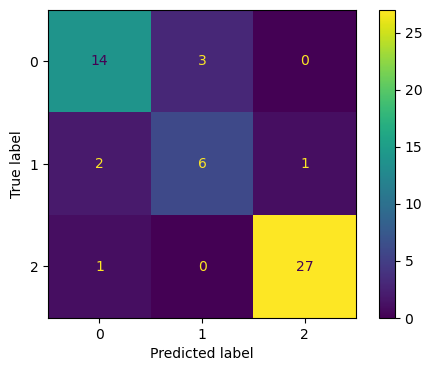

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = pipeline.predict(x_test)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 4))
# Create the matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)

plt.show();

In [26]:
print(pipeline.score(x_test,y_test))

0.8703703703703703


In [27]:
print(pipeline.score(x_train,y_train))

0.9302325581395349


In [28]:
from sklearn.metrics import roc_auc_score

# Generate membership scores with .predict_proba
y_pred_probs = pipeline.predict_proba(x_test)

# Calculate ROC_AUC
roc_auc_score(
    y_test, y_pred_probs, multi_class="ovr", average="weighted"
)

0.97233216122105

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.67      0.67      0.67         9
           2       0.96      0.96      0.96        28

    accuracy                           0.87        54
   macro avg       0.82      0.82      0.82        54
weighted avg       0.87      0.87      0.87        54



In [30]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.8703703703703703

In [40]:
import joblib 
joblib.dump(pipeline,'tomatomodel.joblib')

['tomatomodel.joblib']

Now I need to first make a function test which will take an image as input do all the preprocessing over the input, extract the features and then return the feature values for the image

In [31]:
from skimage.feature import greycomatrix, greycoprops
from skimage.io import imread, imshow, imsave
from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
import cv2
from skimage.measure.entropy import shannon_entropy
from PIL import Image
from skimage import io
from scipy.stats import skew

In [32]:
def entropy_mask_viz(image,factor):
    image_gray = rgb2gray(image)
    entropy_image = entropy(image_gray, disk(4),)
    scaled_entropy = entropy_image / entropy_image.max()
    f_size = 24
    threshold = scaled_entropy > factor
    image_a = np.dstack([image[:,:,0]*threshold,
                            image[:,:,1]*threshold,
                            image[:,:,2]*threshold])
#         plt.imshow(image_a)
#         plt.axis('off')
    return image_a

In [33]:
def test(image):
#     img = imread(f'{self.name}/{i}/'+image)
#     mask_image = self.entropy_mask_viz(img,threshold)
#     path = f"{self.name}MaskImages/{image}"
#     imsave(path, mask_image)
#     mean_R, mean_G, mean_B = [],[],[]
#     std_R,std_G,std_B = [],[],[]
#     skewness_R,skewness_G,skewness_B = [],[],[]
#     contrast_0,correlation_0,energy_0,homogeneity_0 = [],[],[],[]
#     contrast_45,correlation_45,energy_45,homogeneity_45 = [],[],[],[]
#     contrast_90,correlation_90,energy_90,homogeneity_90 = [],[],[],[]
#     contrast_135,correlation_135,energy_135,homogeneity_135 = [],[],[],[]
#     i = []
#     img = io.imread(f'{self.name}MaskImages/'+image)
    img = entropy_mask_viz(image,0.3)
    img1 = img[..., :3]
    x = np.array(img)
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    img = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
#             Statistical Features
    R, G, B = np.dsplit(img1, img1.shape[-1])
    mean_R=(np.mean(R))
    mean_G=(np.mean(G))
    mean_B=(np.mean(B))
    std_R=(np.std(R))
    std_G=(np.std(G))
    std_B=(np.std(B))
    skewness_R=(skew(R.flatten()))
    skewness_G=(skew(G.flatten()))
    skewness_B=(skew(B.flatten()))
#             Texture Feature
    glcm_0 = greycomatrix(img, [5], [0], levels=256, normed=True, symmetric=True)
    glcm_45 = greycomatrix(img, [5], [np.pi/4], levels=256, normed=True, symmetric=True)
    glcm_90 = greycomatrix(img, [5], [np.pi/2], levels=256, normed=True, symmetric=True)
    glcm_135 = greycomatrix(img, [5], [3*np.pi/4], levels=256, normed=True, symmetric=True)
#             Contrast
    contrast_0=(greycoprops(glcm_0, 'contrast')[0][0])
    contrast_45=(greycoprops(glcm_45, 'contrast')[0][0])
    contrast_90=(greycoprops(glcm_90, 'contrast')[0][0])
    contrast_135=(greycoprops(glcm_135, 'contrast')[0][0])
#             Correlation
    correlation_0=(greycoprops(glcm_0, 'correlation')[0][0])
    correlation_45=(greycoprops(glcm_45, 'correlation')[0][0])
    correlation_90=(greycoprops(glcm_90, 'correlation')[0][0])
    correlation_135=(greycoprops(glcm_135, 'correlation')[0][0])
#             Energy
    energy_0=(greycoprops(glcm_0, 'energy')[0][0])
    energy_45=(greycoprops(glcm_45, 'energy')[0][0])
    energy_90=(greycoprops(glcm_90, 'energy')[0][0])
    energy_135=(greycoprops(glcm_135, 'energy')[0][0])
#             Homogeneity
    homogeneity_0=(greycoprops(glcm_0, 'homogeneity')[0][0])
    homogeneity_45=(greycoprops(glcm_45, 'homogeneity')[0][0])
    homogeneity_90=(greycoprops(glcm_90, 'homogeneity')[0][0])
    homogeneity_135=(greycoprops(glcm_135, 'homogeneity')[0][0])
    d = {'Mean_R':mean_R,'Mean_G':mean_G,'Mean_B':mean_B,'Std_R':std_R,'Std_G':std_G,
         'Std_B':std_B,'Skew_R':skewness_R,'Skew_G':skewness_G,'Skew_B':skewness_B,
         'Contrast_0':contrast_0,'Correlation_0':correlation_0,'Energy_0':energy_0,'Homogeneity_0':homogeneity_0,
        'Contrast_45':contrast_45,'Correlation_45':correlation_45,'Energy_45':energy_45,'Homogeneity_45':homogeneity_45,
        'Contrast_90':contrast_90,'Correlation_90':correlation_90,'Energy_90':energy_90,'Homogeneity_90':homogeneity_90,
        'Contrast_135':contrast_135,'Correlation_135':correlation_135,'Energy_135':energy_135,'Homogeneity_135':homogeneity_135}
    return d

In [34]:
img = imread('toma.jpeg')
d = test(img)

In [35]:
d

{'Mean_R': 123.4796818529794,
 'Mean_G': 56.0941845145899,
 'Mean_B': 40.066353326568034,
 'Std_R': 117.86221512740477,
 'Std_G': 75.59763496427169,
 'Std_B': 69.72164336853629,
 'Skew_R': -0.04008311642259247,
 'Skew_G': 1.2052801706785612,
 'Skew_B': 1.903345663816942,
 'Contrast_0': 1870.4089498259182,
 'Correlation_0': 0.8300816018955953,
 'Energy_0': 0.44414956044517523,
 'Homogeneity_0': 0.5104594333549548,
 'Contrast_45': 2392.3988320507005,
 'Correlation_45': 0.7831446042459825,
 'Energy_45': 0.4370474361111264,
 'Homogeneity_45': 0.492769734494885,
 'Contrast_90': 2024.4906300324824,
 'Correlation_90': 0.8160839612831666,
 'Energy_90': 0.44353617645299254,
 'Homogeneity_90': 0.5032477538711758,
 'Contrast_135': 2349.963449524669,
 'Correlation_135': 0.786991095704,
 'Energy_135': 0.4371735205259,
 'Homogeneity_135': 0.49291975033720337}

In [36]:
dct = {k:[v] for k,v in d.items()}  # WORKAROUND
df = pd.DataFrame(dct)

In [37]:
df

,Mean_R,Mean_G,Mean_B,Std_R,Std_G,Std_B,Skew_R,Skew_G,Skew_B,Contrast_0,...,Energy_45,Homogeneity_45,Contrast_90,Correlation_90,Energy_90,Homogeneity_90,Contrast_135,Correlation_135,Energy_135,Homogeneity_135
0,123.48,56.09,40.07,117.86,75.60,69.72,-0.04,1.21,1.90,1870.41,...,0.44,0.49,2024.49,0.82,0.44,0.50,2349.96,0.79,0.44,0.49


In [38]:
prediction = pipeline.predict(df)

In [39]:
prediction

array([1], dtype=int64)